In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import make_moons
import numpy as np

In [59]:
from numpy import *
def loadSimpData():
    datMat= matrix([[1.,2.1],
                   [2.,1.1],
                    [1.3,1.],
                    [1.,1.],
                    [2.,1.]])
    classLabels= [1.0,1.0,-1.0,-1.0,1.0]
    return datMat,classLabels

In [60]:
datMat,classLabels = loadSimpData()

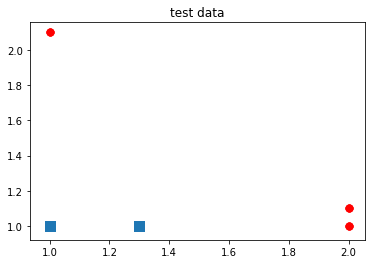

In [61]:
for i in range(len(classLabels)):
    if classLabels[i]==1.0:
        xcord1.append(datMat[i,0]),ycord1.append(datMat[i,1])
    else:
        xcord0.append(datMat[i,0]),ycord0.append(datMat[i,1])

fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(xcord0,ycord0,marker='s',s=90)
ax.scatter(xcord1,ycord1,marker='o',s=50,c='red')
plt.title('test data')
plt.show()

In [39]:
def stumpClassify(dataMatrix,dimen,thrshVal,threshlneq):
    retArray = ones((shape(dataMatrix)[0],1))
    if threshlneq == 'lt':
        retArray[dataMatrix[:,dimen] <= thrshVal] = -1.0
    else:
        retArray[dataMatrix[:,dimen] > thrshVal] = -1.0
    return retArray

In [57]:
def buildStump(dataArr,classLabels,D):
    dataMatrix = mat(dataArr); labelMat = mat(classLabels).T
    m,n = shape(dataMatrix)
    numSteps = 10.0; bestStump ={}; bestClasEst = mat(zeros((m,1)))
    minError = inf
    for i in range(n):
        rangeMin = dataMatrix[:,i].min(); rangeMax = dataMatrix[:,i].max();
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1,int(numSteps)+1):
            for inequal in['it','gt']:
                threshVal = (rangeMin+float(j)*stepSize)
                predictedVals = stumpClassify(dataMatrix,i,threshVal,inequal)
                errArr = mat(ones((m,1)))
                errArr[predictedVals==labelMat] = 0
                weightedError = D.T*errArr
                print("split:dim{},thrsh {}, \
                thresh ineqal: {}, the weighted error is {}"\
                     .format(i,threshVal,inequal,weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim']=i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump,minError,bestClasEst    

In [58]:
D = mat(ones((5,1))/5)
buildStump(datMat,classLabels,D)

split:dim0,thrsh 0.9,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 0.9,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.0,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.0,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.1,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.1,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.2,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.2,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.3,                 thresh ineqal: it, the weighted error is [[0.8]]
split:dim0,thrsh 1.3,                 thresh ineqal: gt, the weighted error is [[0.8]]
split:dim0,thrsh 1.4,                 thresh ineqal: it, the weighted error is [[0.8]]
split:dim0,thrsh 1.4,                 thres

({'dim': 0, 'thresh': 2.0, 'ineq': 'it'}, matrix([[0.4]]), array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]))

In [72]:
def adaBoostTrainDS(dataArr,classLabels,numlt=40):
    weakClassArr =[]
    m = shape(dataArr)[0]
    D = mat(ones((m,1))/m) #init D to all equal
    aggClassEst = mat(zeros((m,1)))
    for i in range(numlt):
        bestStump,error,classEst = buildStump(dataArr,classLabels,D)
        print("D:{}".format(D.T))
        alpha = float(0.5*log((1.0-error))/max(error,1e-16))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)
        print("classEst:{}".format(classEst.T))
        expon = multiply(-1*alpha*mat(classLabels).T,classEst)
        D = multiply(D,exp(expon))
        D = D/D.sum()
        aggClassEst += alpha*classEst
        print("aggClassEst:{}".format(aggClassEst.T))
        aggErrors = multiply(sign(aggClassEst) != mat(classLabels).T,ones((m,1)))
        errorRate = aggErrors.sum()/m
        print("total eror:{}".format(errorRate))
        if errorRate ==0.0: break
    return weakClassArr

In [73]:
adaBoostTrainDS(datMat,classLabels,9)

split:dim0,thrsh 0.9,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 0.9,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.0,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.0,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.1,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.1,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.2,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.2,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.3,                 thresh ineqal: it, the weighted error is [[0.8]]
split:dim0,thrsh 1.3,                 thresh ineqal: gt, the weighted error is [[0.8]]
split:dim0,thrsh 1.4,                 thresh ineqal: it, the weighted error is [[0.8]]
split:dim0,thrsh 1.4,                 thres

[{'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.6385320297074883},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.5438369100971224},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.5153451197108718},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.5055465288822307},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.502027434875297},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.5007441055562267},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.500273505616401},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.500100585258019},
 {'dim': 0, 'thresh': 2.0, 'ineq': 'it', 'alpha': -0.5000369989420347}]

In [76]:
def adaClassify(datToClass,classifierArr):
    dataMatrix = mat(datToClass)
    m = shape(dataMatrix)[0]
    aggClassEst = mat(zeros((m,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix,classifierArr[i]['dim'],\
                                 classifierArr[i]['thresh'],\
                                 classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
        print(aggClassEst)
    return sign(aggClassEst)

In [78]:
classifierArr = adaBoostTrainDS(datMat,classLabels,30)

split:dim0,thrsh 0.9,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 0.9,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.0,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.0,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.1,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.1,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.2,                 thresh ineqal: it, the weighted error is [[0.6]]
split:dim0,thrsh 1.2,                 thresh ineqal: gt, the weighted error is [[0.6]]
split:dim0,thrsh 1.3,                 thresh ineqal: it, the weighted error is [[0.8]]
split:dim0,thrsh 1.3,                 thresh ineqal: gt, the weighted error is [[0.8]]
split:dim0,thrsh 1.4,                 thresh ineqal: it, the weighted error is [[0.8]]
split:dim0,thrsh 1.4,                 thres

split:dim0,thrsh 1.1,                 thresh ineqal: gt, the weighted error is [[0.6666665]]
split:dim0,thrsh 1.2,                 thresh ineqal: it, the weighted error is [[0.6666665]]
split:dim0,thrsh 1.2,                 thresh ineqal: gt, the weighted error is [[0.6666665]]
split:dim0,thrsh 1.3,                 thresh ineqal: it, the weighted error is [[0.666667]]
split:dim0,thrsh 1.3,                 thresh ineqal: gt, the weighted error is [[0.666667]]
split:dim0,thrsh 1.4,                 thresh ineqal: it, the weighted error is [[0.666667]]
split:dim0,thrsh 1.4,                 thresh ineqal: gt, the weighted error is [[0.666667]]
split:dim0,thrsh 1.5,                 thresh ineqal: it, the weighted error is [[0.666667]]
split:dim0,thrsh 1.5,                 thresh ineqal: gt, the weighted error is [[0.666667]]
split:dim0,thrsh 1.6,                 thresh ineqal: it, the weighted error is [[0.666667]]
split:dim0,thrsh 1.6,                 thresh ineqal: gt, the weighted error i

split:dim1,thrsh 1.44,                 thresh ineqal: it, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.44,                 thresh ineqal: gt, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.55,                 thresh ineqal: it, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.55,                 thresh ineqal: gt, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.6600000000000001,                 thresh ineqal: it, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.6600000000000001,                 thresh ineqal: gt, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.77,                 thresh ineqal: it, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.77,                 thresh ineqal: gt, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.8800000000000001,                 thresh ineqal: it, the weighted error is [[0.33333333]]
split:dim1,thrsh 1.8800000000000001,                 thresh ineqal: gt, the weighted error is [[0.33333